In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


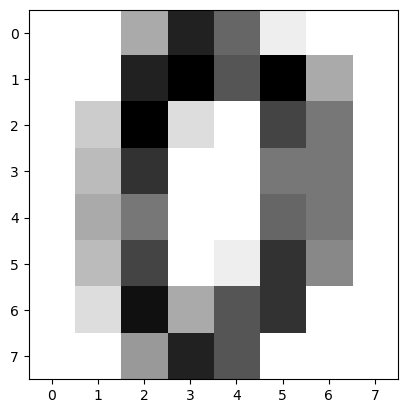

In [8]:
digits=datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [9]:
#평탄화
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [11]:
#원핫 인코딩
labels=to_categorical(digits.target)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
model = Sequential()

model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax') 
])


In [26]:
model.compile(optimizer=Adam(learning_rate=0.02),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
import numpy as np
model_history=model.fit(x=X_train, y=y_train, epochs=10, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4398 - loss: 2.4842 - val_accuracy: 0.8472 - val_loss: 0.4760
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8905 - loss: 0.3680 - val_accuracy: 0.9028 - val_loss: 0.2938
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9297 - loss: 0.2114 - val_accuracy: 0.9167 - val_loss: 0.3452
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9384 - loss: 0.1889 - val_accuracy: 0.9306 - val_loss: 0.3121
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9510 - loss: 0.1957 - val_accuracy: 0.9514 - val_loss: 0.2275
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9769 - loss: 0.0764 - val_accuracy: 0.9444 - val_loss: 0.3730
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9631 - loss: 0.1370 - val_accuracy: 0.9375 - val_loss: 0.3162
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9622 - loss: 0.1306 - val_accuracy: 0.9444 - v

In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print("정확도:", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9302 - loss: 0.4112
정확도: 0.925000011920929


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[4.1617638e-09 1.5175948e-06 2.4693064e-10 3.2308790e-08 7.2303791e-10
  4.5685461e-13 1.9604462e-08 1.6662939e-10 9.9999833e-01 6.7303787e-08]]


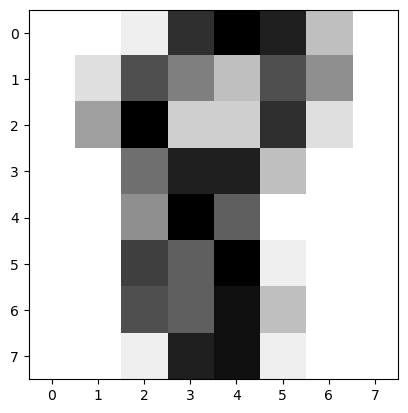

In [32]:
plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
pred = model.predict(X_test[10].reshape(1, -1))
print(pred)

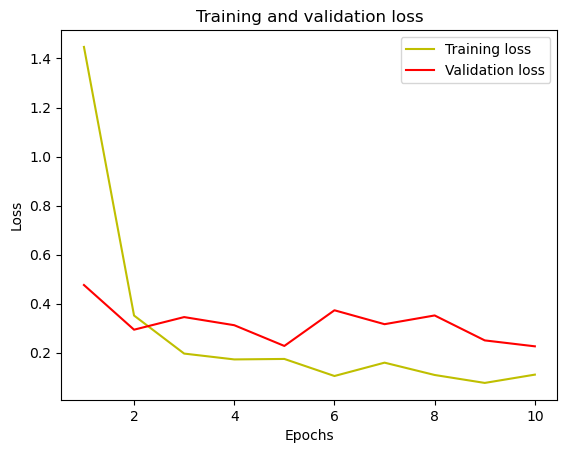

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

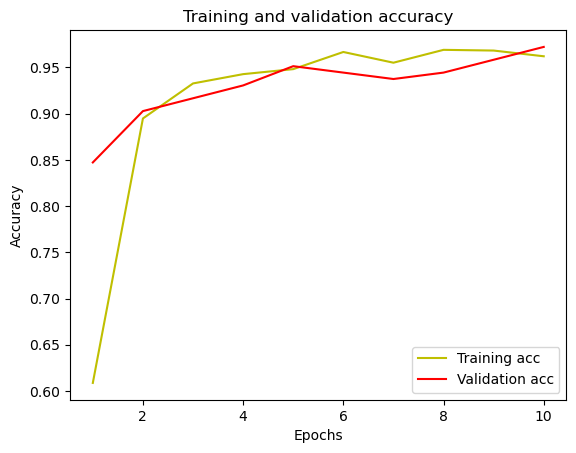

In [34]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.87      0.95      0.91        43
           2       0.97      1.00      0.98        29
           3       1.00      0.85      0.92        41
           4       0.91      0.97      0.94        33
           5       0.92      0.82      0.87        28
           6       0.89      0.97      0.93        35
           7       1.00      1.00      1.00        43
           8       0.89      0.79      0.84        39
           9       0.85      0.89      0.87        37

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.92       360
weighted avg       0.93      0.93      0.92       360

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  2  0]
 [ 0  0 29  0  0  0  0  0  0  0]
 [ 0  0  1 35  0  1  0  0  0  4]
 [ 0  0  0  0 32  0  1  0  0  0]
 [ 0  1  0  0  1 23  2  0  0  1]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0